<a href="https://colab.research.google.com/github/Ziadelsamanody/Face-Experssion-System/blob/main/Face_Experssion_Data_Agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as  np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout,BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten


In [ ]:
!kaggle datasets download msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 99% 60.0M/60.3M [00:00<00:00, 323MB/s]
100% 60.3M/60.3M [00:00<00:00, 311MB/s]


In [ ]:
!unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
train_dir = "/content/train"
test_dir = "/content/test"

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,
                                   rescale=1./255,
                                   validation_split=0.2)

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

Found 22968 images belonging to 7 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)


Found 1432 images belonging to 7 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(5,5), activation="relu", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(5,5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(7,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 44, 44, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 44, 44, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 18, 18, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 18, 18, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         518,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 728,167 (2.78 MB)

 Trainable params: 727,783 (2.78 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_generator, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.2509 - loss: 2.0714
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.3712 - loss: 1.6036
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.3958 - loss: 1.5316
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.4363 - loss: 1.4612
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.4505 - loss: 1.4038
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.4748 - loss: 1.3538
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4886 - loss: 1.3304
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.5026 - loss: 1.3051
Epoch 9/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.5121 - loss: 1.2828
Epoch 10/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5236 - loss: 1.2567
Epoch 11/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.5308 - loss: 1.2325
Epoch 12/100
359/359 ━━━━━━━━━━

In [ ]:
model.evaluate(validation_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5784 - loss: 1.2736


[1.2551918029785156, 0.5782122611999512]

In [ ]:

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=50)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.2079 - loss: 2.4529
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.3413 - loss: 1.7609
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.4302 - loss: 1.4987
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.4727 - loss: 1.3757
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.5118 - loss: 1.2887
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.5291 - loss: 1.2318
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.5402 - loss: 1.2070
Epoch 8/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.5616 - loss: 1.1648
Epoch 9/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5674 - loss: 1.1413
Epoch 10/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.5733 - loss: 1.1245
Epoch 11/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5904 - loss: 1.0968
Epoch 12/50
359/359 ━━━━━━━━━━

In [ ]:
saved_model = model.save("modelaugv1.h5")

<Axes: xlabel='Epoch'>

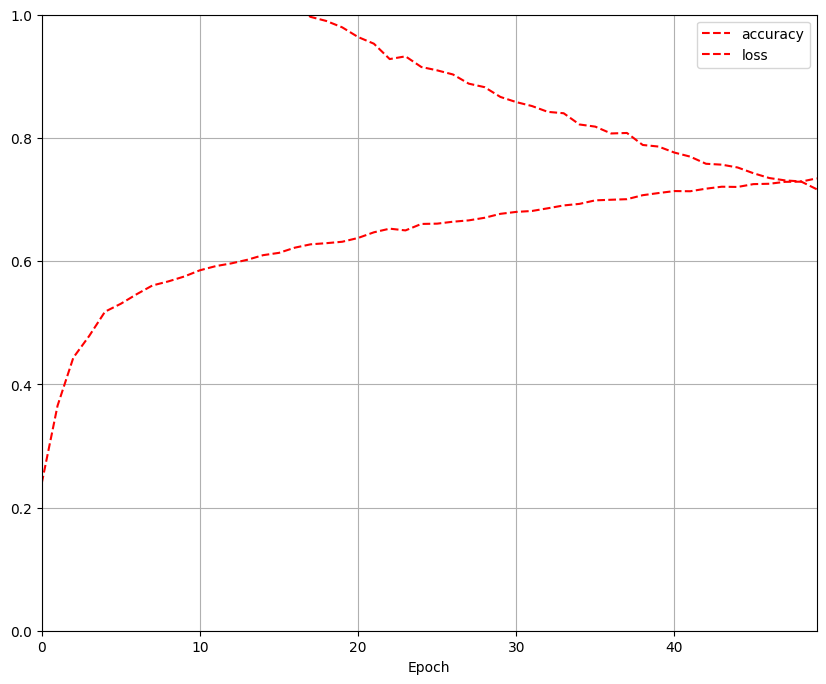

In [ ]:
import pandas as pd
pd.DataFrame(model.history.history).plot(figsize=(10,8), xlim=[0,49], ylim=[0,1], grid=True, xlabel="Epoch", style=["r--","r--","b-","b-"])

In [ ]:
model.evaluate(validation_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6495 - loss: 1.0021


[0.9579683542251587, 0.6599162220954895]

In [ ]:
from collections import Counter
import numpy as np
all_labels = []

for _, labels in  train_generator:
    all_labels.extend(labels)

class_count = Counter(all_labels)
print(f"class Distributoin {class_count}")

KeyboardInterrupt: 